Lab3: Mining Data Streams

# How to Run



1. Ensure to have Python 3 and several libraries such as NumPy installed on your machine.
1. Press "run all".

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import random
import tqdm

In [2]:
path = os.path.dirname(os.getcwd())
# data_path = os.path.join(path, 'data','web-Stanford.txt', 'web-Stanford.txt')
# data_path = os.path.join(path, 'data','web-NotreDame.txt', 'web-NotreDame.txt')
data_path = os.path.join(path, 'data','facebook_combined.txt', 'facebook_combined.txt')
data_path

'c:\\Users\\Linyi Zhang\\Desktop\\data_mining\\HW3\\Datamining_HW3\\data\\facebook_combined.txt\\facebook_combined.txt'

web-NotreDame.txt

Nodes	325729

Edges	1497134

Number of triangles	8910005



Social circles: Facebook

Nodes	4039
Edges	88234

Number of triangles	1612010


In [3]:
from collections import defaultdict
from scipy.stats import bernoulli
from functools import reduce



In [4]:
class Triest_base:
    def __init__(self,M):
        """
        This function initializes the class and sets all counters to zero. Additionally, it initializes the memory size to M.
             
        :param length: the size of the memory for the algorithm
        :param sample: record all the edges in the memory
        :param t: the number of edges processed so far
        :param tau: the number of triangles found so far
        :param tauV: the number of triangles that node v is involved in
        :param neighbours: the neighbours of each node
       
        """
        assert M>=6
        self.length=M
        self.sample: set[frozenset[int]] = set()
        self.t=0
        self.tau=0
        self.tauV=defaultdict(int)
        self.neighbours=defaultdict(set)
    
    def insert(self,filename):

        """
        This function reads the graph from the file and inserts the edges one by one. It returns the number of triangles found so far.

        :param filename: the path of the file that contains the graph
        :param edges: the edges of the graph
        :return: the number of triangles found so far
        """

        with open(filename, 'r') as file:

            
            for line in file:
                
                self.t+=1
                edges=line.split()
                if edges[0]==edges[1]:
                    continue
                edge=frozenset({int(edges[0]),int(edges[1])})
                if self.sample_edge(edge):
                    self.sample.add(edge)
                    self.UpdateCounter(list(edge),"+")
        return self.tau * max(1.0 , self.t*(self.t-1)*(self.t-2)/(self.length*(self.length-1)*(self.length-2)))

                    
    
    def sample_edge(self,edge:set):
        if self.t<=self.length:
            return True
        elif  bernoulli.rvs(p=self.length / self.t):
            edge=random.choice(list(self.sample))
            self.sample.remove(edge)
            self.UpdateCounter(list(edge),"-")
            return True
        return False
    
    def UpdateCounter(self,edge,opeartion):
        u=edge[0]
        v=edge[1]
       
   
        if opeartion=="+":
            self.neighbours[u].add(v)
            self.neighbours[v].add(u)
            intersection=self.neighbours[u]&self.neighbours[v]

          
            for c in intersection:
                self.tau+=1
                self.tauV[c]+=1
                self.tauV[u]+=1
                self.tauV[v]+=1

            
        elif opeartion=="-":
            self.neighbours[u].discard(v)
            self.neighbours[v].discard(u)
            if len(self.neighbours[u])==0:
                del self.neighbours[u]
                return
            if len(self.neighbours[v])==0:
                del self.neighbours[v]
                return
            intersection=self.neighbours[u]&self.neighbours[v]


            for c in intersection:
                self.tau-=1
                self.tauV[c]-=1
                self.tauV[u]-=1
                self.tauV[v]-=1
                


[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000]


  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [01:13<00:00,  7.32s/it]


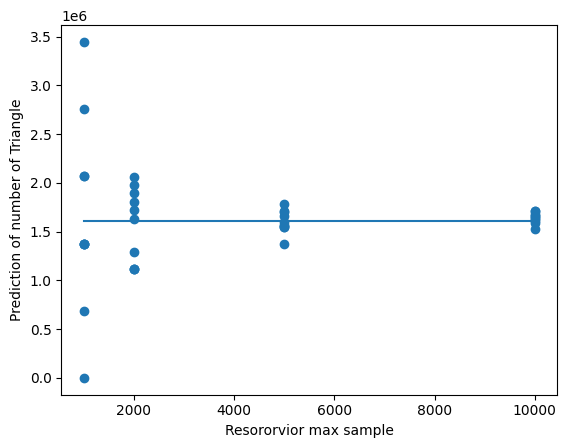

In [5]:
Ms=[1000,2000,5000,10000]
test=10
X=[i for i in Ms for _ in range(test)]
print(X)
Y=[]
for M in Ms:
    for _ in tqdm.tqdm(range(test)):
        algor=Triest_base(M=M)
        
        Y.append(algor.insert(data_path))
plt.scatter(X,Y)
plt.xlabel("Resororvior max sample")
plt.ylabel("Prediction of number of Triangle")
plt.plot([Ms[0], Ms[-1]], [1612010, 1612010])
plt.show()


In [9]:
class TRIEST_IMPR:
    def __init__(self,M):
        self.length=M
        self.sample=list()
        self.t=-1
        self.tau=0
        self.tauV=defaultdict(int)
        self.neighbours=defaultdict(set)
    
    def insert(self,filename):
        with open(filename, 'r') as file:
  
            
            for line in file:
                if line.strip():
                    self.t+=1
                    edges=line.strip().split()
                    edge=frozenset({int(edges[0]),int(edges[1])})
                    self.UpdateCounter(list(edge))
                    if self.sample_edge(edge,self.t):
                        self.sample.append(edge)
                    
    
    def sample_edge(self,edge:set,t):
        if self.t<=self.length:
            return True
        elif random.random()<=self.length/t:
            edge=random.choice(self.sample)
            self.sample.remove(edge)
            return True
        return False
    
    def UpdateCounter(self,edge):
        u=edge[0]
        v=edge[1]
        intersection: set[int] = reduce(
            lambda a, b: a & b,
            [
                {
                    node
                    for link in self.sample if vertex in link
                    for node in link if node != vertex
                }
                for vertex in edge
            ]
        )
    
        # self.neighbours[u].add(v)
        # self.neighbours[v].add(u)
        # intersection=self.neighbours[u]&self.neighbours[v]
        eta=max(1,(self.t-1)*(self.t-2)/(self.length*(self.length-1)))
        for c in intersection:
            self.tau+=eta
            self.tauV[c]+=eta
            self.tauV[u]+=eta
            self.tauV[v]+=eta


[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000]


100%|██████████| 10/10 [07:49<00:00, 46.91s/it]


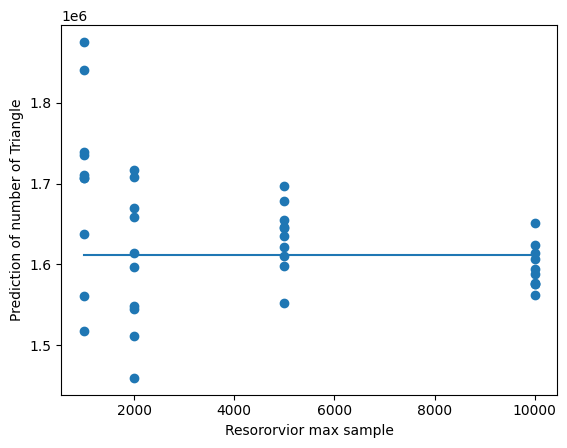

In [10]:

Ms=[1000,2000,5000,10000]
test=10
X=[i for i in Ms for _ in range(test)]
print(X)
Y=[]
for M in Ms:
    for _ in tqdm.tqdm(range(10)):
        algor=TRIEST_IMPR(M=M)
        algor.insert(data_path)
        Y.append(algor.tau)
plt.scatter(X,Y)
plt.xlabel("Resororvior max sample")
plt.ylabel("Prediction of number of Triangle")
plt.plot([Ms[0], Ms[-1]], [1612010, 1612010])
plt.show()

# Questions

1.*What were the challenges you have faced when implementing the algorithm?*

Implementing the algorithm posed challenges primarily in selecting the most appropriate data structures, despite the algorithm being well-documented and accompanied by pseudocode. 

2.*Can the algorithm be easily parallelized? If yes, how? If not, why? Explain.*

Parallelizing the algorithm isn't straightforward due to its inherent design for stream processing with blocking operations on counters reliant on the current state of the sample set, which dynamically changes. 

3.*Does the algorithm work for unbounded graph streams? Explain.*

The algorithm is designed to function on unbounded data streams, providing real-time estimations of the triangle count. Its reliance on the current triangles counter, sample set size, and observed samples in the stream facilitates its continuous operation without needing the entire stream at once.

4.*Does the algorithm support edge deletions? If not, what modification would it need? Explain.*

Although TRIÈST-BASE and TRIÈST-IMPR do not support edge deletions, the same paper where they are presented describes TRIÈST-FD, a fully dynamic version. TRIÈST-FD builds upon the concept of Random Pairing (RP) by keeping track of the number of edges deleted from the sample set due to deletion in the stream and the overall number of deletions. This information then drives the insertion of a new edge in the sample set and the formula for the estimation of the number of triangles.